<a href="https://colab.research.google.com/github/mauro-nievoff/Aprendizaje-de-Maquina-2022/blob/main/AM_TP_2_Nievas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico 2

## Ejercicio 1

### Setup y datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
url = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/casos_covid_bahia.csv'
casos_covid = pd.read_csv(url)

url_2 = 'https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/4_DataWrangling/data/camas_covid_bahia.csv'
camas_covid = pd.read_csv(url_2)

### Casos de COVID

In [34]:
casos_covid.shape

(88, 11)

In [35]:
casos_covid.head()

,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0


In [36]:
casos_covid['fecha'] = pd.to_datetime(casos_covid['fecha'], format='%Y-%m-%d')

# Para ciertas variables, el dataset incluye solo valores acumulados, por lo que genero nuevas columnas con los valores diarios en esos casos.

casos_covid['nuevos_confirmados'] = casos_covid['confirmados'].diff()

casos_covid['nuevos_recuperados'] = casos_covid['recuperados'].diff()

casos_covid['nuevos_decesos'] = casos_covid['decesos'].diff()

casos_covid['nuevos_descartados'] = casos_covid['descartados'].diff()

In [37]:
casos_covid.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,nuevos_confirmados,nuevos_recuperados,nuevos_decesos,nuevos_descartados
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,87.000000,87.000000,87.000000,87.000000
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0,33.402299,15.666667,0.689655,36.367816
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0,33.602139,13.822518,1.015122,22.607426
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0,3.000000,0.000000,0.000000,6.000000
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0,12.500000,6.000000,0.000000,21.000000
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0,18.000000,13.000000,0.000000,30.000000
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0,40.500000,20.000000,1.000000,43.000000
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0,136.000000,73.000000,5.000000,128.000000


Text(0.5, 0.9, 'Valores de variables según fecha (casos_covid)')

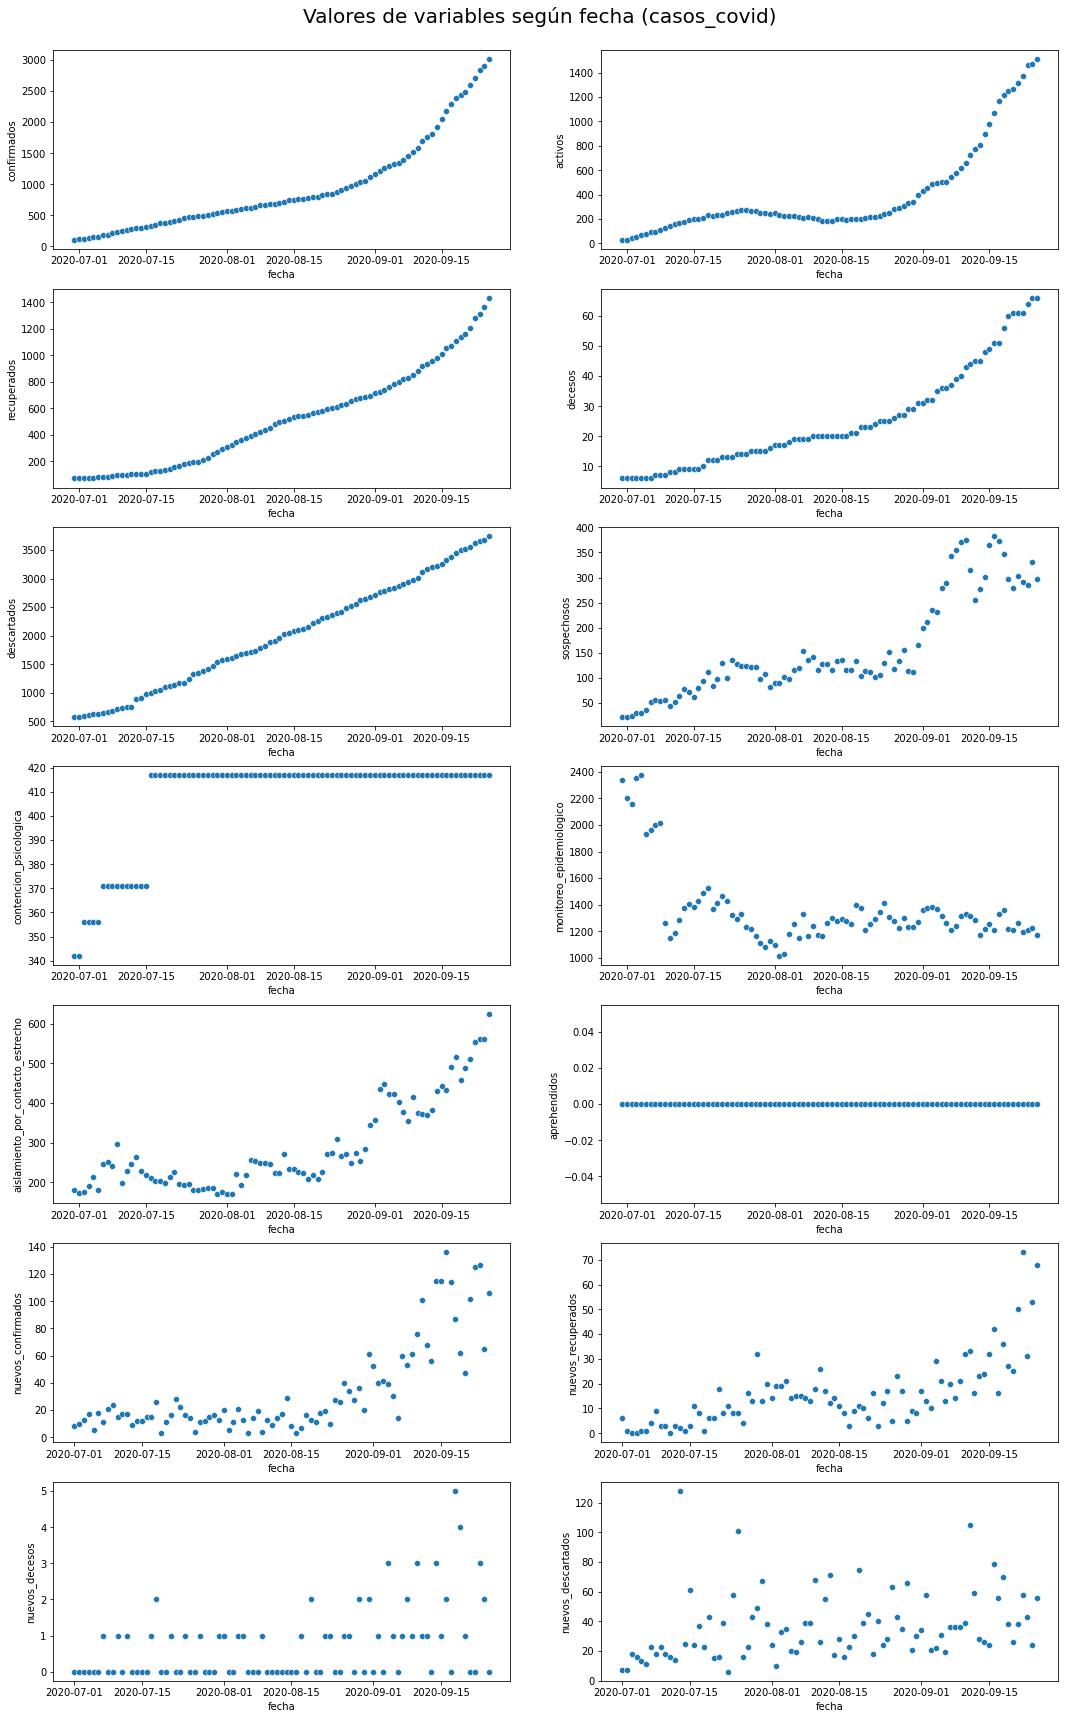

In [39]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18,30))

for i, column in enumerate(casos_covid._get_numeric_data().columns):

  sns.scatterplot(data = casos_covid, x = 'fecha', y = column, ax=axes[i//2,i%2]).set()

plt.suptitle('Valores de variables según fecha (casos_covid)', fontsize = 20, y = 0.90)

Evalúo la normalidad de las variables de manera gráfica.

Text(0.5, 0.91, 'Distribución de valores según variable (casos_covid)')

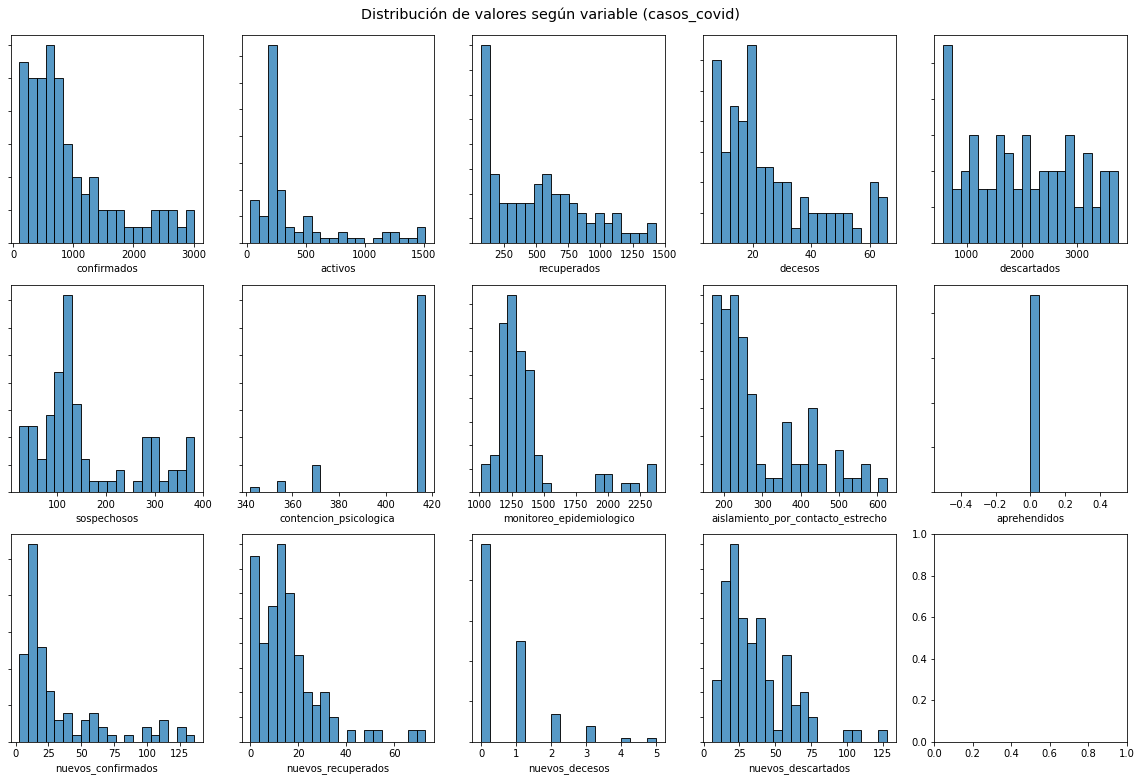

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20,13))

for i, column in enumerate(casos_covid._get_numeric_data().columns):

  sns.histplot(casos_covid[column],ax=axes[i//5,i%5], bins = 20).set(yticklabels=[], ylabel=None)

plt.suptitle('Distribución de valores según variable (casos_covid)', fontsize = 'x-large', y = 0.91)

- A partir de los gráficos, la única variable que pareciera ser normal es 'descartados'.
- La variable aprehendidos me llama la atención, porque su valor es cero en todas las fechas. Lo más probable es que no haya habido aprehendidos durante el período, aunque habría que descartar que los datos se hayan perdido de alguna manera.
- También me llama la atención la variable contencion_psicologica. Si se refiere a las personas que son atendidas, esperaría que no fuera tan constante (aunque puede ser que se refiera a la cantidad de cupos para el servicio en lugar de la cantidad de personas atendidas).


### Camas de COVID

In [48]:
camas_covid.shape

(88, 19)

In [49]:
camas_covid.head()

,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN


In [50]:
camas_covid['fecha'] = pd.to_datetime(camas_covid['fecha'], format='%Y-%m-%d')

In [51]:
camas_covid.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


Text(0.5, 0.89, 'Valores de variables según fecha (camas_covid)')

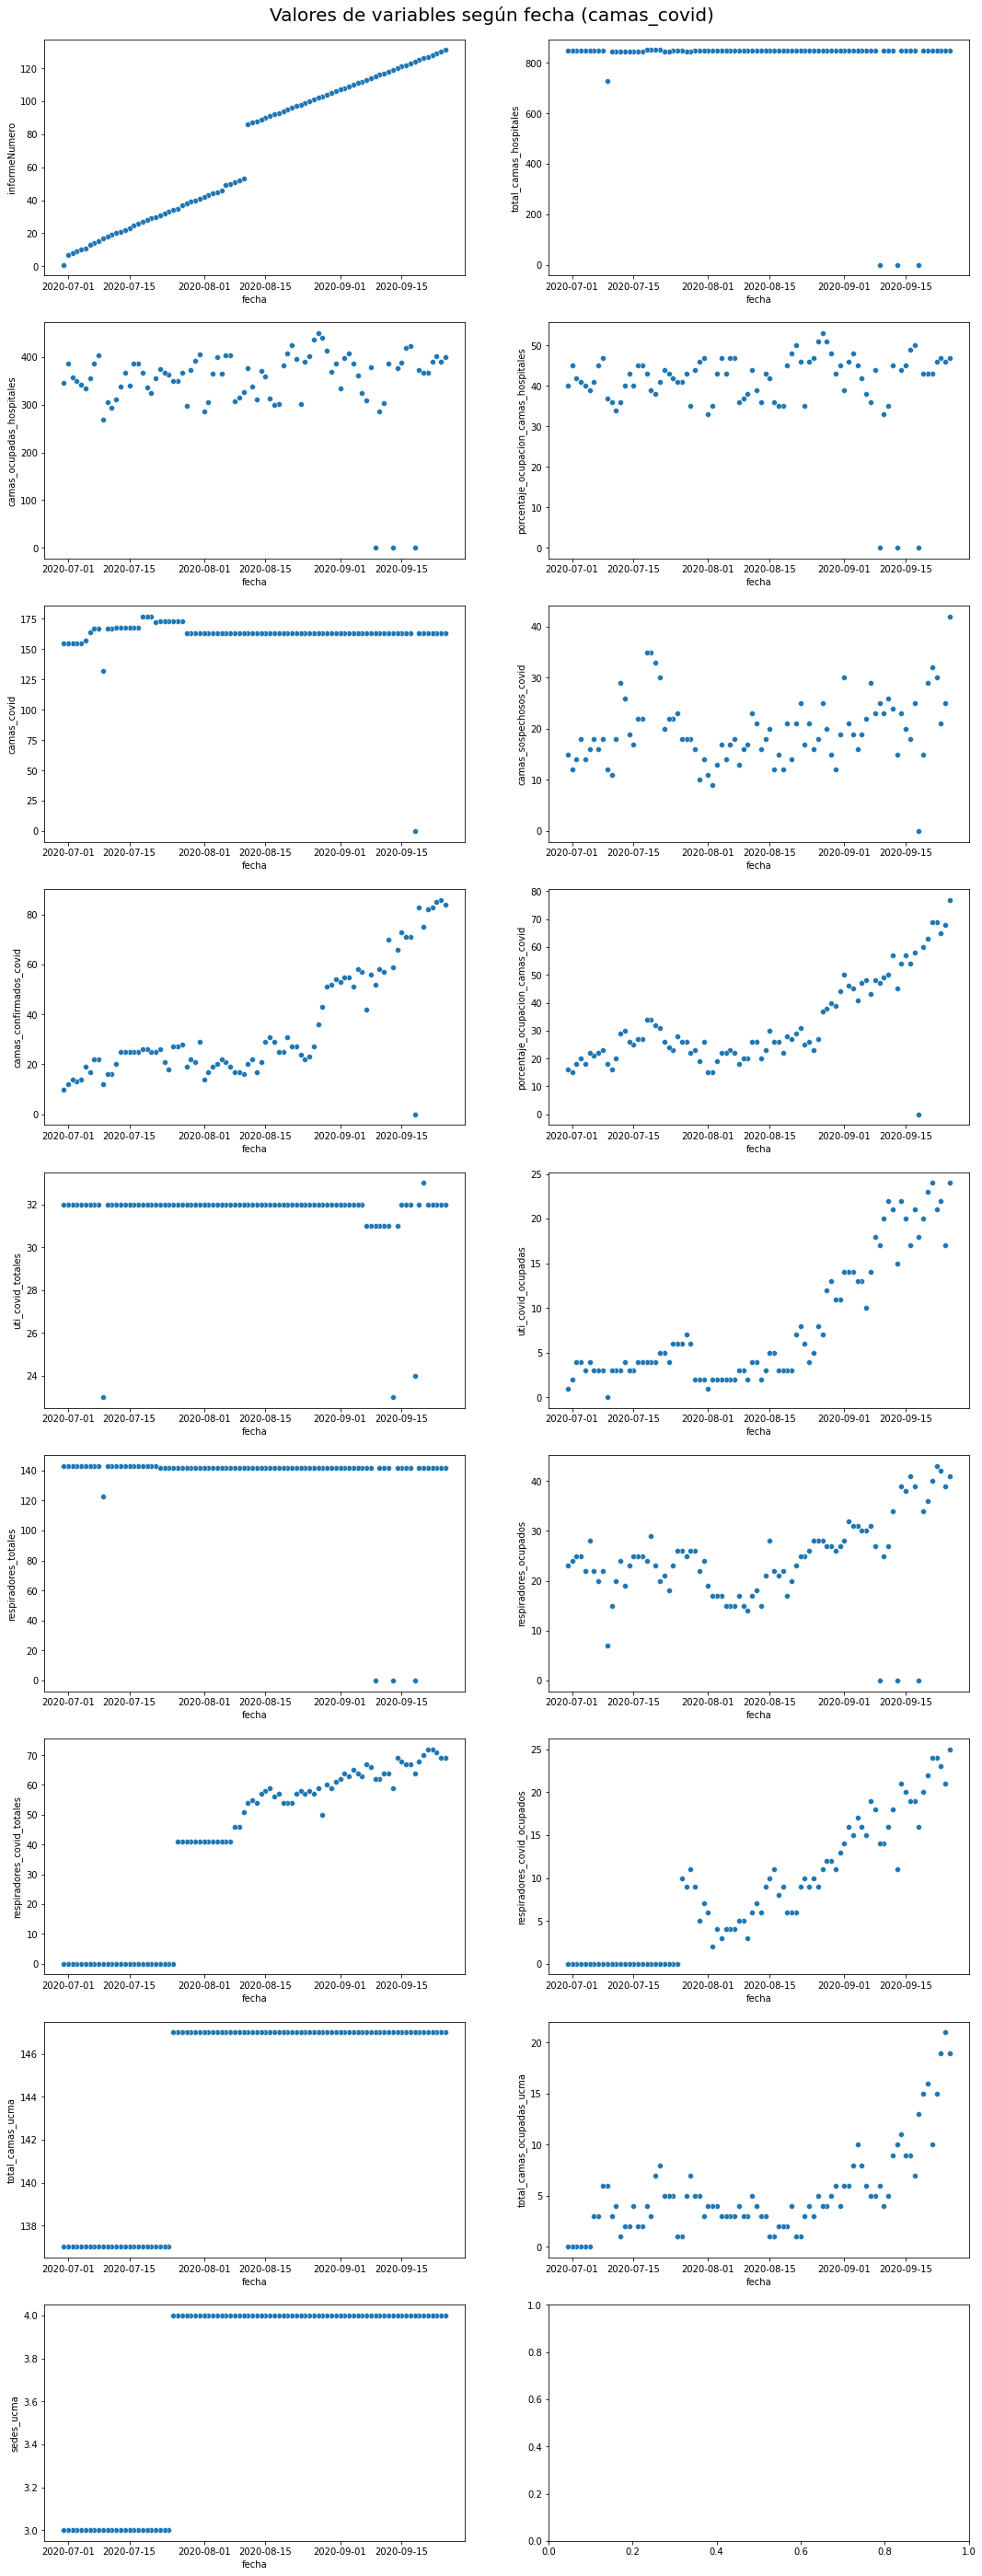

In [52]:
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(18,50))

for i, column in enumerate(camas_covid._get_numeric_data().columns):

  sns.scatterplot(data = camas_covid, x = 'fecha', y = column, ax=axes[i//2,i%2])

plt.suptitle('Valores de variables según fecha (camas_covid)', fontsize = 20, y = 0.89)

Text(0.5, 0.91, 'Distribución de valores según variable (camas_covid)')

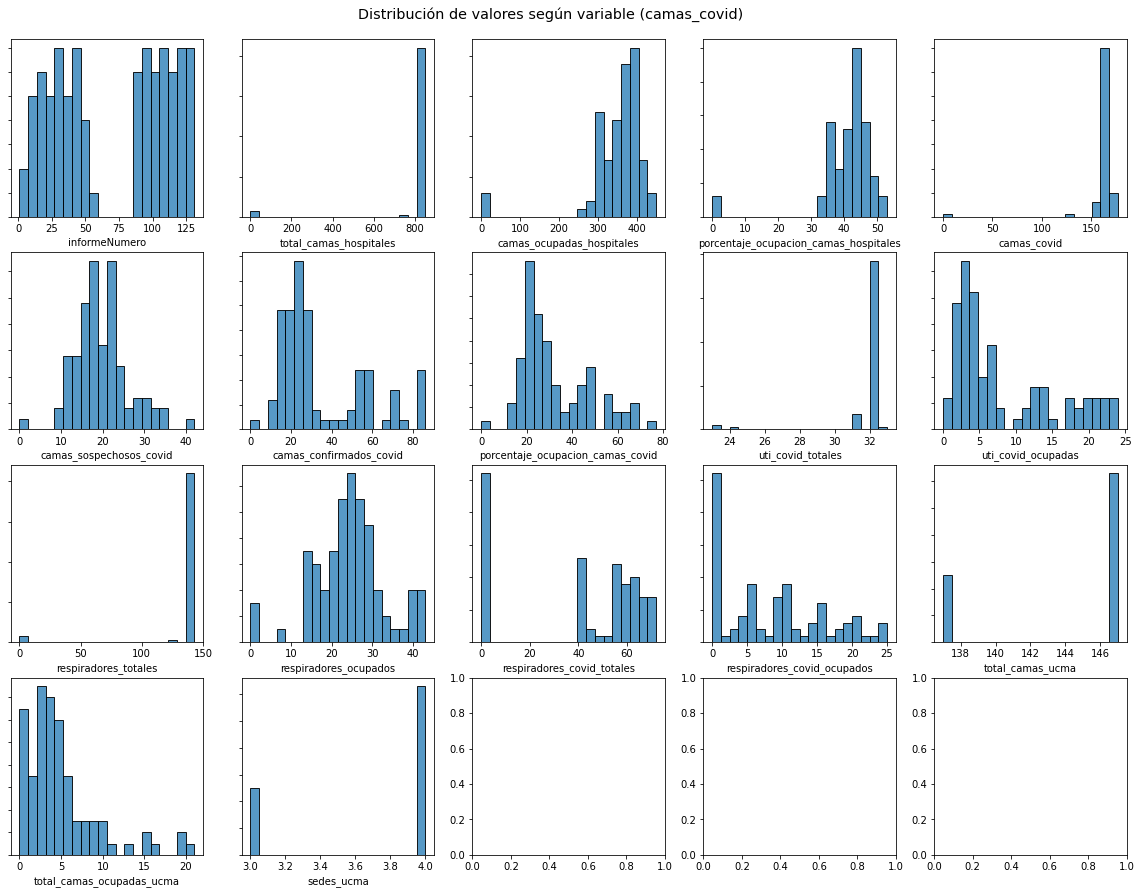

In [54]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,15))

for i, column in enumerate(camas_covid._get_numeric_data().columns):

  sns.histplot(camas_covid[column],ax=axes[i//5,i%5], bins = 20).set(yticklabels=[], ylabel=None)

plt.suptitle('Distribución de valores según variable (camas_covid)', fontsize = 'x-large', y = 0.91)

- Variables aparentemente normales: 'camas_ocupadas_hospitales', 'porcentaje_ocupacion_camas_hospitales' y 'camas_sospechosos_covid' (variables con curvas similares a la gaussiana).
- La variable 'informeNumero' parece sospechosa (faltan informes).
- En distintas variables, en ciertas fechas hay valores atípicos (ceros), como por ejemplo en respiradores_totales.
- En respiradores_covid_totales, primero la variable toma valores constantes (cero y 40), y luego se ve mucho más variabilidad, por lo que seguramente haya cambiado la forma de medición o los criterios para asignar respiradores para pacientes con COVID.

## Ejercicio 2

In [ ]:
def generar_dataset(caracteristicas_a, caracteristicas_b):

  np.random.seed(7)

  muestra_A = np.random.normal(loc=caracteristicas_a[0], scale=caracteristicas_a[1], size=caracteristicas_a[2])

  muestra_B = np.random.normal(loc=caracteristicas_b[0], scale=caracteristicas_b[1], size=caracteristicas_b[2])

  muestra_A_df = pd.DataFrame(muestra_A, columns = ['valor'])

  muestra_B_df = pd.DataFrame(muestra_B, columns = ['valor'])

  muestra_A_df['etiqueta'] = 'A'

  muestra_B_df['etiqueta'] = 'B'

  df = pd.concat([muestra_A_df, muestra_B_df], ignore_index = True)

  return df

In [ ]:
df = generar_dataset([30, 10, 50], [80, 30, 50])

In [ ]:
df.head()

,valor,etiqueta
0,46.905257,A
1,25.340626,A
2,30.328202,A
3,34.075163,A
4,22.110770,A


In [64]:
from sklearn.metrics import confusion_matrix

def calcular_metricas(dataframe, rango_umbrales):

  metricas = pd.DataFrame(columns = ['valor_umbral', 'tn', 'fp', 'fn', 'tp', 'especificidad', '1-especificidad', 'sensibilidad', 'exactitud', 'precision', 'f_measure'])

  for valor_umbral in rango_umbrales:

    dataframe['prediccion'] = dataframe['valor'].apply(lambda x: 'A' if x < valor_umbral else 'B')

    tn, fp, fn, tp = confusion_matrix(dataframe['etiqueta'], dataframe['prediccion']).ravel()

    metricas_dict = {'valor_umbral': valor_umbral, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp}

    metricas_dict['sensibilidad'] = tp / (tp + fn)

    metricas_dict['especificidad'] = tn / (tn + fp)

    metricas_dict['1-especificidad'] = 1 - (tn / (tn + fp))

    metricas_dict['precision'] = tp / (tp + fp)

    metricas_dict['exactitud'] = (tp + tn) / (tp + tn + fp + fn)

    metricas_dict['f_measure'] = tp / (tp + 0.5 * (fp + fn))

    metricas = metricas.append(metricas_dict, ignore_index = True)

  # Calculo la distancia de cada punto a la esquina superior izquierda, para encontrar los mejores valores umbrales.

  metricas = metricas.assign(distancia_a_esquina = lambda x: ((1 - x['sensibilidad'])**2 + (x['1-especificidad'])**2)**0.5)

  return metricas

In [ ]:
metricas_df = calcular_metricas(df, rango_umbrales = range(0, 100, 2))

In [ ]:
metricas_df.head()

,valor_umbral,tn,fp,fn,tp,especificidad,1-especificidad,sensibilidad,exactitud,precision,f_measure,distancia_a_esquina
0,0.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00
1,2.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00
2,4.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00
3,6.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00
4,8.0,1.0,49.0,0.0,50.0,0.02,0.98,1.0,0.51,0.505051,0.671141,0.98


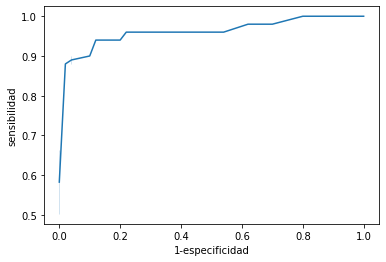

In [ ]:
sns.lineplot(data = metricas_df, x = '1-especificidad', y = 'sensibilidad')

In [ ]:
# Elijo el valor umbral que está más cerca de la esquina superior izquierda.

metricas_df[metricas_df['distancia_a_esquina'] == min(metricas_df['distancia_a_esquina'])]['valor_umbral'].tolist()

[48.0]

### Comparaciones entre datasets

Creo nuevos datasets modificando las medias, los desvíos estándar y los tamaños de los grupos. Para elegir los valores umbrales de manera no supervisada o programática, utilizo el valor de la columna distancia_a_esquina creada por la función calcular_metricas() (el valor mínimo corresponde al mejor valor umbral).

#### Cambiando la distancia entre medias

In [ ]:
parametros_b = [[35, 20, 50],
                [60, 20, 50],
                [100, 20, 50]]

descripciones = ['cerca', 'intermedio', 'lejos']

metricas_segun_media = pd.DataFrame()

for i in range(len(parametros_b)):

  df = generar_dataset([30, 10, 50], parametros_b[i])

  metricas = calcular_metricas(df, rango_umbrales = range(0, 100, 2))

  metricas['descripcion'] = descripciones[i]

  metricas_segun_media = pd.concat([metricas_segun_media, metricas]).reset_index(drop = True)

metricas_segun_media.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/p

,valor_umbral,tn,fp,fn,tp,especificidad,1-especificidad,sensibilidad,exactitud,precision,f_measure,distancia_a_esquina,descripcion
0,0.0,0.0,50.0,2.0,48.0,0.00,1.00,0.96,0.48,0.489796,0.648649,1.000800,cerca
1,2.0,0.0,50.0,2.0,48.0,0.00,1.00,0.96,0.48,0.489796,0.648649,1.000800,cerca
2,4.0,0.0,50.0,2.0,48.0,0.00,1.00,0.96,0.48,0.489796,0.648649,1.000800,cerca
3,6.0,0.0,50.0,2.0,48.0,0.00,1.00,0.96,0.48,0.489796,0.648649,1.000800,cerca
4,8.0,1.0,49.0,3.0,47.0,0.02,0.98,0.94,0.48,0.489583,0.643836,0.981835,cerca


In [ ]:
metricas_segun_media[metricas_segun_media['distancia_a_esquina'] == min(metricas_segun_media['distancia_a_esquina'])][['valor_umbral', 'descripcion']]

,valor_umbral,descripcion
127,54.0,lejos
128,56.0,lejos
129,58.0,lejos
130,60.0,lejos


#### Cambiando desvío estándar

In [ ]:
parametros_b = [[60, 10, 50],
                [60, 20, 50],
                [60, 50, 50]]

descripciones = ['ds bajo', 'ds intermedio', 'ds alto']

metricas_segun_ds = pd.DataFrame()

for i in range(len(parametros_b)):

  df = generar_dataset([30, 10, 50], parametros_b[i])

  metricas = calcular_metricas(df, rango_umbrales = range(0, 100, 2))

  metricas['descripcion'] = descripciones[i]

  metricas_segun_ds = pd.concat([metricas_segun_ds, metricas]).reset_index(drop = True)

metricas_segun_ds.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars


,valor_umbral,tn,fp,fn,tp,especificidad,1-especificidad,sensibilidad,exactitud,precision,f_measure,distancia_a_esquina,descripcion
0,0.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00,ds bajo
1,2.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00,ds bajo
2,4.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00,ds bajo
3,6.0,0.0,50.0,0.0,50.0,0.00,1.00,1.0,0.50,0.500000,0.666667,1.00,ds bajo
4,8.0,1.0,49.0,0.0,50.0,0.02,0.98,1.0,0.51,0.505051,0.671141,0.98,ds bajo


In [ ]:
metricas_segun_ds[metricas_segun_ds['distancia_a_esquina'] == min(metricas_segun_ds['distancia_a_esquina'])][['valor_umbral', 'descripcion']]

,valor_umbral,descripcion
24,48.0,ds bajo


#### Cambiando tamaño

In [ ]:
parametros_b = [[60, 20, 30],
                [60, 20, 50],
                [60, 20, 100]]

descripciones = ['muestra pequeña', 'muestra intermedia', 'muestra grande']

metricas_segun_muestra = pd.DataFrame()

for i in range(len(parametros_b)):

  df = generar_dataset([30, 10, 50], parametros_b[i])

  metricas = calcular_metricas(df, rango_umbrales = range(0, 100, 2))

  metricas['descripcion'] = descripciones[i]

  metricas_segun_muestra = pd.concat([metricas_segun_muestra, metricas]).reset_index(drop = True)

metricas_segun_muestra.head()

,valor_umbral,tn,fp,fn,tp,especificidad,1-especificidad,sensibilidad,exactitud,precision,f_measure,distancia_a_esquina,descripcion
0,0.0,0.0,50.0,0.0,30.0,0.00,1.00,1.0,0.3750,0.375000,0.545455,1.00,muestra pequeña
1,2.0,0.0,50.0,0.0,30.0,0.00,1.00,1.0,0.3750,0.375000,0.545455,1.00,muestra pequeña
2,4.0,0.0,50.0,0.0,30.0,0.00,1.00,1.0,0.3750,0.375000,0.545455,1.00,muestra pequeña
3,6.0,0.0,50.0,0.0,30.0,0.00,1.00,1.0,0.3750,0.375000,0.545455,1.00,muestra pequeña
4,8.0,1.0,49.0,0.0,30.0,0.02,0.98,1.0,0.3875,0.379747,0.550459,0.98,muestra pequeña


In [ ]:
metricas_segun_muestra[metricas_segun_muestra['distancia_a_esquina'] == min(metricas_segun_muestra['distancia_a_esquina'])][['valor_umbral', 'descripcion']]

,valor_umbral,descripcion
71,42.0,muestra intermedia


## Ejercicio 3

In [75]:
np.random.seed(7)

muestra_A_x = np.random.normal(loc=30, scale=10, size=50)

muestra_B_x = np.random.normal(loc=80, scale=30, size=50)

muestra_A_y = np.random.normal(loc=4, scale=1, size=50)

muestra_B_y = np.random.normal(loc=9, scale=3, size=50)

muestra_A_2d = pd.DataFrame.from_dict({'x': muestra_A_x, 'y': muestra_A_y})

muestra_B_2d = pd.DataFrame.from_dict({'x': muestra_B_x, 'y': muestra_B_y})

muestra_A_2d['etiqueta'] = 'A'

muestra_B_2d['etiqueta'] = 'B'

df_2d = pd.concat([muestra_A_2d, muestra_B_2d], ignore_index = True)

In [76]:
df_2d.head()

,x,y,etiqueta
0,46.905257,3.135510,A
1,25.340626,4.374370,A
2,30.328202,4.391546,A
3,34.075163,2.556878,A
4,22.110770,4.486335,A


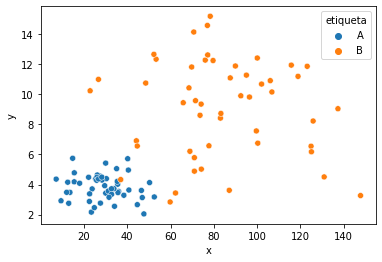

In [77]:
sns.scatterplot(data = df_2d, x = 'x', y = 'y', hue = 'etiqueta')

Una opción para asignar las predicciones es dividir el plano en dos por medio de una recta.

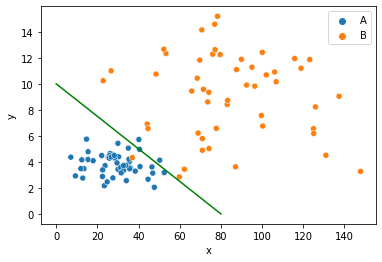

In [78]:
recta = pd.DataFrame.from_dict({'x': [0, 80], 'y': [10, 0]})

fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=df_2d, x='x', y='y', hue = 'etiqueta', ax=ax)
p2 = sns.lineplot(data=recta, x='x', y='y', color='g', ax=ax)

In [83]:
# Predicción en base al resultado de una función (y = -0.125 x + 10).

pendiente = -0.125

ordenada_al_origen = 10

df_2d['prediccion'] = np.where((df_2d['y'] > (pendiente * df_2d['x'] + ordenada_al_origen)), 'B', 'A')

In [80]:
df_2d.head()

,x,y,etiqueta,prediccion
0,46.905257,3.135510,A,A
1,25.340626,4.374370,A,A
2,30.328202,4.391546,A,A
3,34.075163,2.556878,A,A
4,22.110770,4.486335,A,A


In [81]:
# Con esta recta, hay cuatro predicciones incorrectas.

df_2d[df_2d['etiqueta'] != df_2d['prediccion']]

,x,y,etiqueta,prediccion
8,40.176580,5.717730,A,B
23,50.290722,4.130623,A,B
28,40.493965,4.964200,A,B
56,36.951096,4.331137,B,A


Creo una función similar a la del punto 2 para probar distintos parámetros (pendiente y ordenada al origen) y elegir la mejor combinación.

In [82]:
def calcular_metricas_con_recta(dataframe, parametros):

  metricas = pd.DataFrame(columns = ['pendiente', 'ordenada_al_origen', 'tn', 'fp', 'fn', 'tp', 'especificidad', '1-especificidad', 'sensibilidad', 'exactitud', 'precision', 'f_measure'])

  for (pendiente, ordenada_al_origen) in parametros:

    dataframe['comparacion'] = pendiente * dataframe['x'] + ordenada_al_origen > dataframe['y']

    dataframe['prediccion'] = dataframe['comparacion'].apply(lambda x: 'A' if x == True else 'B')

    tn, fp, fn, tp = confusion_matrix(dataframe['etiqueta'], dataframe['prediccion']).ravel()

    metricas_dict = {'pendiente': pendiente, 'ordenada_al_origen': ordenada_al_origen, 'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp}

    metricas_dict['sensibilidad'] = tp / (tp + fn)

    metricas_dict['especificidad'] = tn / (tn + fp)

    metricas_dict['1-especificidad'] = 1 - (tn / (tn + fp))

    metricas_dict['precision'] = tp / (tp + fp)

    metricas_dict['exactitud'] = (tp + tn) / (tp + tn + fp + fn)

    metricas_dict['f_measure'] = tp / (tp + 0.5 * (fp + fn))

    metricas = metricas.append(metricas_dict, ignore_index = True)

  # Calculo la distancia de cada punto a la esquina superior izquierda, para encontrar los mejores valores umbrales.

  metricas = metricas.assign(distancia_a_esquina = lambda x: ((1 - x['sensibilidad'])**2 + (x['1-especificidad'])**2)**0.5)

  return metricas

Pruebo distintas combinaciones de parámetros y elijo la que tenga menor distancia a la esquina superior izquierda en la curva ROC.

In [84]:
parametros = [(-0.125, 10), (-0.125, 11), (-0.125, 9),
              (-0.120, 10), (-0.120, 11), (-0.120, 9),
              (-0.130, 10), (-0.130, 11), (-0.130, 9)]

metricas = calcular_metricas_con_recta(df_2d, parametros)

metricas

,pendiente,ordenada_al_origen,tn,fp,fn,tp,especificidad,1-especificidad,sensibilidad,exactitud,precision,f_measure,distancia_a_esquina
0,-0.125,10.0,47.0,3.0,1.0,49.0,0.94,0.06,0.98,0.96,0.942308,0.960784,0.063246
1,-0.125,11.0,50.0,0.0,2.0,48.0,1.00,0.00,0.96,0.98,1.000000,0.979592,0.040000
2,-0.125,9.0,43.0,7.0,1.0,49.0,0.86,0.14,0.98,0.92,0.875000,0.924528,0.141421
3,-0.120,10.0,48.0,2.0,1.0,49.0,0.96,0.04,0.98,0.97,0.960784,0.970297,0.044721
4,-0.120,11.0,50.0,0.0,3.0,47.0,1.00,0.00,0.94,0.97,1.000000,0.969072,0.060000
5,-0.120,9.0,43.0,7.0,1.0,49.0,0.86,0.14,0.98,0.92,0.875000,0.924528,0.141421
6,-0.130,10.0,47.0,3.0,1.0,49.0,0.94,0.06,0.98,0.96,0.942308,0.960784,0.063246
7,-0.130,11.0,50.0,0.0,2.0,48.0,1.00,0.00,0.96,0.98,1.000000,0.979592,0.040000
8,-0.130,9.0,42.0,8.0,0.0,50.0,0.84,0.16,1.00,0.92,0.862069,0.925926,0.160000


In [85]:
metricas[metricas['distancia_a_esquina'] == min(metricas['distancia_a_esquina'])][['pendiente', 'ordenada_al_origen', 'distancia_a_esquina']]

,pendiente,ordenada_al_origen,distancia_a_esquina
1,-0.125,11.0,0.04
7,-0.130,11.0,0.04
